In [1]:
from orbit_generation.dataset import get_first_period_dataset
from orbit_generation.evaluation import evaluate_distance_metrics_and_clustering, machine_learning_evaluation
from orbit_generation.data import TSFeatureWiseScaler
from orbit_generation.dataset import get_first_period_dataset
from orbit_generation.stats import calculate_per_orbit_spatial_statistics

In [2]:
import torch
import numpy as np

# Import Data

In [3]:
data_path = r"/orbit-generation/data/orbits_fix_1500/EM_N_fix_1500.h5"
experiments_folder = "../experiments"
seq_len=100

In [4]:
data, orbit_df, labels, system_dict = get_first_period_dataset(file_path=data_path, segment_length=seq_len)
scaler = TSFeatureWiseScaler()        
scaled_data = scaler.fit_transform(torch.tensor(data, dtype=torch.float32))
scaled_data=scaled_data.numpy()
scaled_data = scaled_data[:,1:,:]
scaled_data.shape

(45211, 6, 100)

In [5]:
orbits_id_classes = np.array([orbit_df.at[index, 'id_class'] for index in labels])
orbits_id_classes.shape

(45211,)

# Analyze Distances

## Orbit Distances

All metrics and algorithms with 100 samples

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


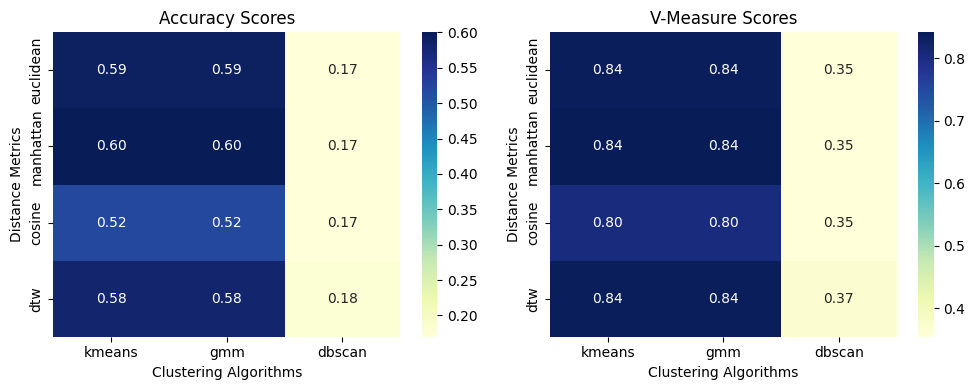

{'euclidean_kmeans': {'Accuracy': np.float64(0.59), 'V-Measure': np.float64(0.8385521029187484)}, 'euclidean_gmm': {'Accuracy': np.float64(0.59), 'V-Measure': np.float64(0.8385521029187484)}, 'euclidean_dbscan': {'Accuracy': np.float64(0.17), 'V-Measure': np.float64(0.35482828974186487)}, 'manhattan_kmeans': {'Accuracy': np.float64(0.6), 'V-Measure': np.float64(0.841291140302864)}, 'manhattan_gmm': {'Accuracy': np.float64(0.6), 'V-Measure': np.float64(0.841291140302864)}, 'manhattan_dbscan': {'Accuracy': np.float64(0.17), 'V-Measure': np.float64(0.35482828974186487)}, 'cosine_kmeans': {'Accuracy': np.float64(0.52), 'V-Measure': np.float64(0.8043130552158055)}, 'cosine_gmm': {'Accuracy': np.float64(0.52), 'V-Measure': np.float64(0.8043130552158055)}, 'cosine_dbscan': {'Accuracy': np.float64(0.17), 'V-Measure': np.float64(0.35482828974186487)}, 'dtw_kmeans': {'Accuracy': np.float64(0.58), 'V-Measure': np.float64(0.8379370850561589)}, 'dtw_gmm': {'Accuracy': np.float64(0.58), 'V-Measure':

In [ ]:
num_samples = 100
indices = np.random.choice(len(data), num_samples, replace=False)

sampled_data = scaled_data[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_data, sampled_classes, evaluation_metrics=['Accuracy', 'V-Measure'])

Evaluate 'euclidean' and 'kmeans' with all orbits

Computing euclidean distances...
Clustering with kmeans...


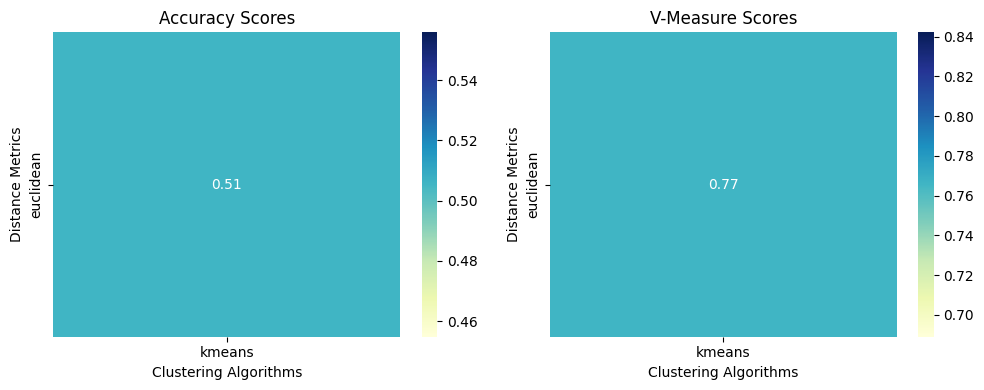

{'euclidean_kmeans': {'Accuracy': np.float64(0.5053416204021145), 'V-Measure': np.float64(0.7655960140849384)}}


In [7]:
results = evaluate_distance_metrics_and_clustering(scaled_data, orbits_id_classes, distance_metrics=['euclidean'],
                                                   clustering_algorithms=['kmeans'], plot_results=True,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

## Feature Distances

In [12]:
feature_names = ['period', 'jacobi', 'stability']
features = orbit_df[feature_names].values
features_3d = features.reshape(features.shape[0], features.shape[1], 1)
features_3d.shape

(45211, 3, 1)

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


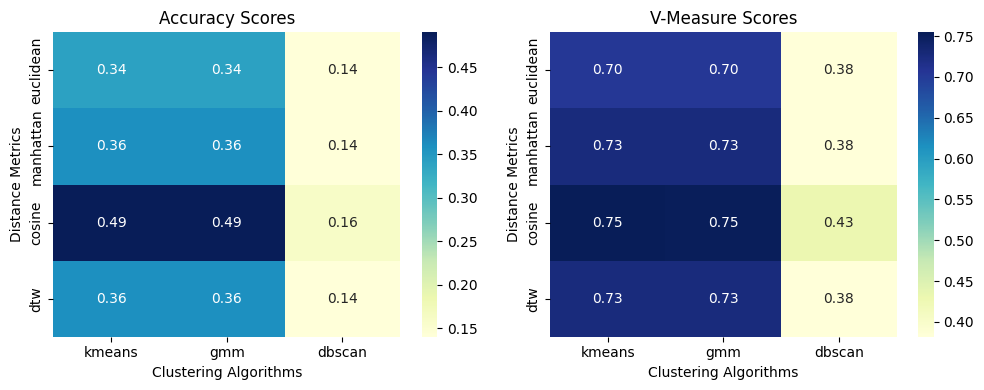

{'euclidean_kmeans': {'Accuracy': np.float64(0.34), 'V-Measure': np.float64(0.7036762273626592)}, 'euclidean_gmm': {'Accuracy': np.float64(0.34), 'V-Measure': np.float64(0.7036762273626592)}, 'euclidean_dbscan': {'Accuracy': np.float64(0.14), 'V-Measure': np.float64(0.3818666532433954)}, 'manhattan_kmeans': {'Accuracy': np.float64(0.36), 'V-Measure': np.float64(0.7259537422988218)}, 'manhattan_gmm': {'Accuracy': np.float64(0.36), 'V-Measure': np.float64(0.7259537422988218)}, 'manhattan_dbscan': {'Accuracy': np.float64(0.14), 'V-Measure': np.float64(0.3818666532433954)}, 'cosine_kmeans': {'Accuracy': np.float64(0.49), 'V-Measure': np.float64(0.7545901619847809)}, 'cosine_gmm': {'Accuracy': np.float64(0.49), 'V-Measure': np.float64(0.7524619495177122)}, 'cosine_dbscan': {'Accuracy': np.float64(0.16), 'V-Measure': np.float64(0.43058381033369825)}, 'dtw_kmeans': {'Accuracy': np.float64(0.36), 'V-Measure': np.float64(0.7259537422988218)}, 'dtw_gmm': {'Accuracy': np.float64(0.36), 'V-Measure

In [ ]:
num_samples = 100
indices = np.random.choice(len(features_3d), num_samples, replace=False)

sampled_features = features_3d[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_features, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


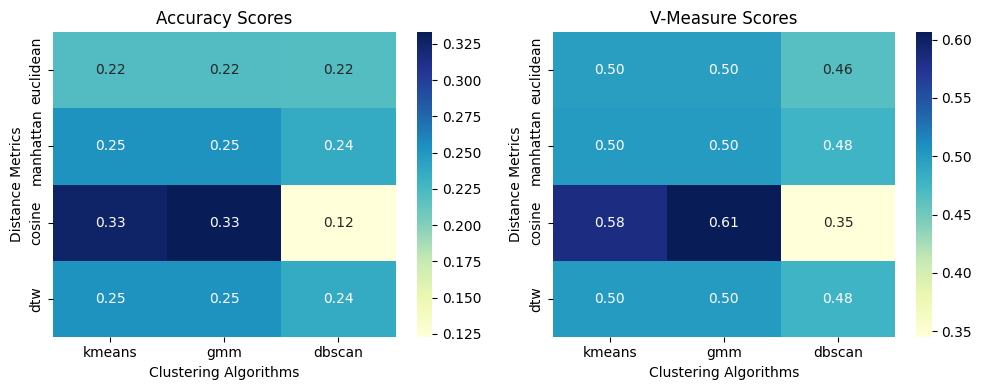

{'euclidean_kmeans': {'Accuracy': np.float64(0.221), 'V-Measure': np.float64(0.496935799898212)}, 'euclidean_gmm': {'Accuracy': np.float64(0.221), 'V-Measure': np.float64(0.496935799898212)}, 'euclidean_dbscan': {'Accuracy': np.float64(0.22), 'V-Measure': np.float64(0.46402341276573184)}, 'manhattan_kmeans': {'Accuracy': np.float64(0.253), 'V-Measure': np.float64(0.4997975686046919)}, 'manhattan_gmm': {'Accuracy': np.float64(0.253), 'V-Measure': np.float64(0.4997975686046919)}, 'manhattan_dbscan': {'Accuracy': np.float64(0.237), 'V-Measure': np.float64(0.47743517019189974)}, 'cosine_kmeans': {'Accuracy': np.float64(0.326), 'V-Measure': np.float64(0.5831640253823462)}, 'cosine_gmm': {'Accuracy': np.float64(0.333), 'V-Measure': np.float64(0.6061515886460462)}, 'cosine_dbscan': {'Accuracy': np.float64(0.123), 'V-Measure': np.float64(0.3452913712760281)}, 'dtw_kmeans': {'Accuracy': np.float64(0.253), 'V-Measure': np.float64(0.4997975686046919)}, 'dtw_gmm': {'Accuracy': np.float64(0.253), '

In [ ]:
num_samples = 1000
indices = np.random.choice(len(features_3d), num_samples, replace=False)

sampled_features = features_3d[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_features, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])

Computing cosine distances...
Clustering with kmeans...


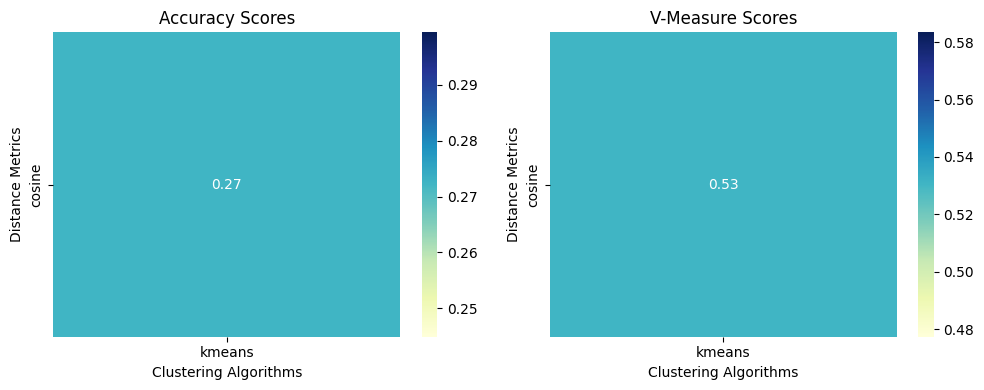

{'cosine_kmeans': {'Accuracy': np.float64(0.272146159120568), 'V-Measure': np.float64(0.5303903485717841)}}


In [23]:
results = evaluate_distance_metrics_and_clustering(features_3d, orbits_id_classes, distance_metrics=['cosine'],
                                                   clustering_algorithms=['kmeans'], plot_results=True,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

# Family Prediction

## By Initial Conditions

In [14]:
initial_conditions = scaled_data[:, :, 0]
initial_conditions.shape

(45211, 6)

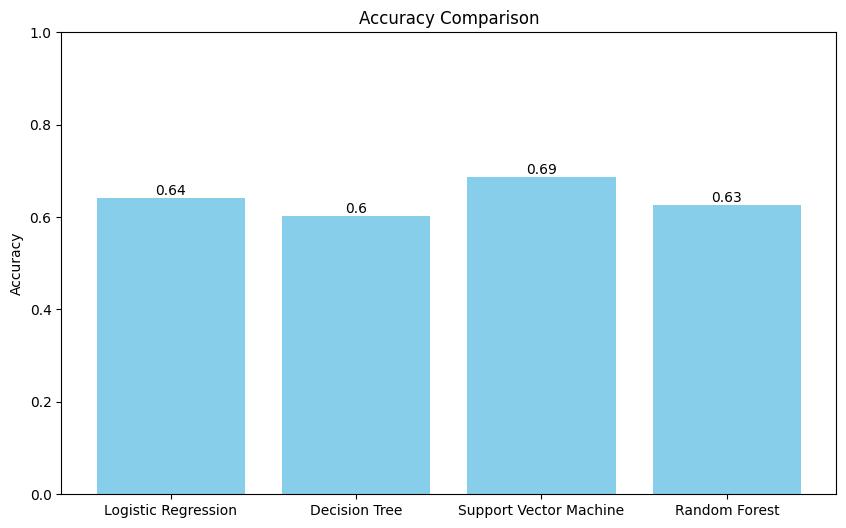

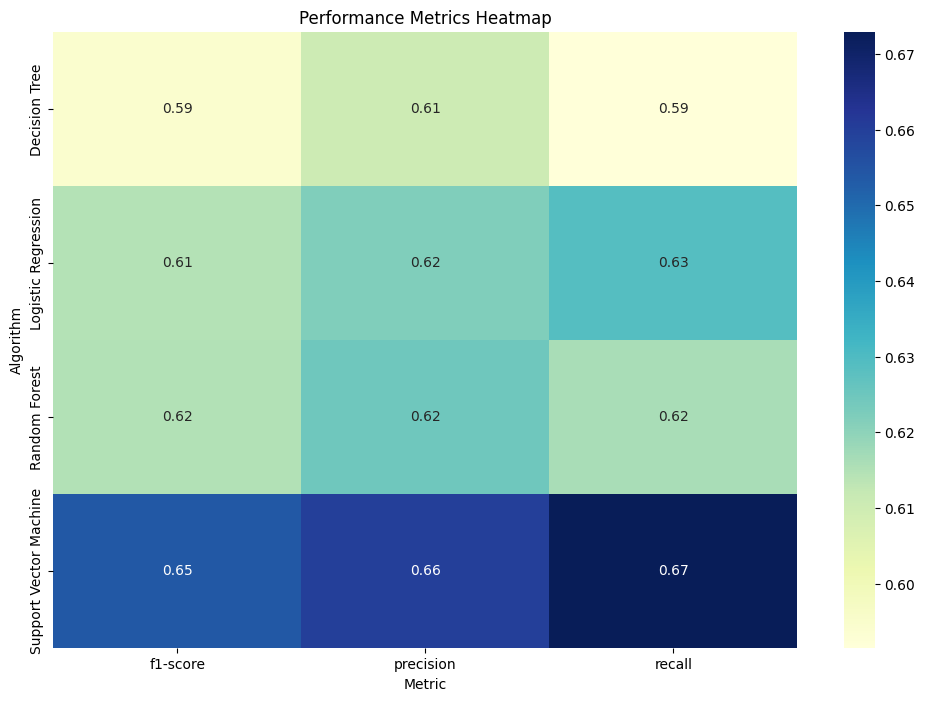

In [15]:
results = machine_learning_evaluation(initial_conditions, orbits_id_classes, print_results=True)

## By Grouped Spatial Coordinates

In [16]:
position_stats = calculate_per_orbit_spatial_statistics(scaled_data)
position_stats.shape

(45211, 6, 6)

Input features reshaped to 2D for processing.


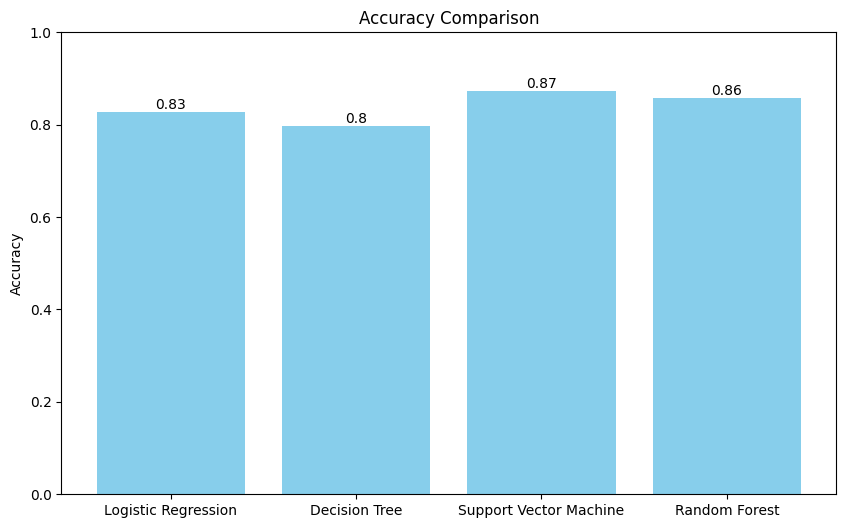

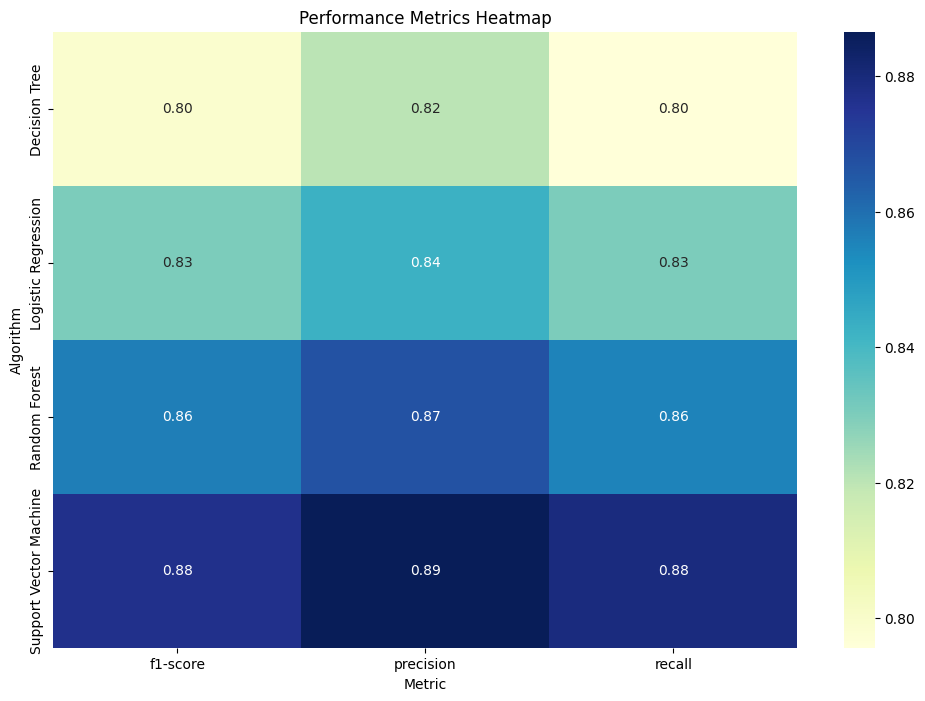

In [17]:
results = machine_learning_evaluation(position_stats, orbits_id_classes, print_results=True)

## By Features

In [18]:
features.shape

(45211, 3)

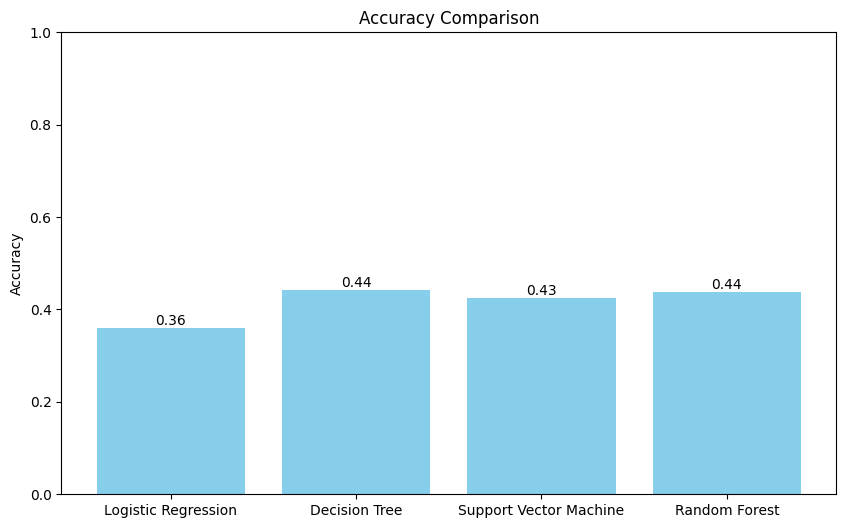

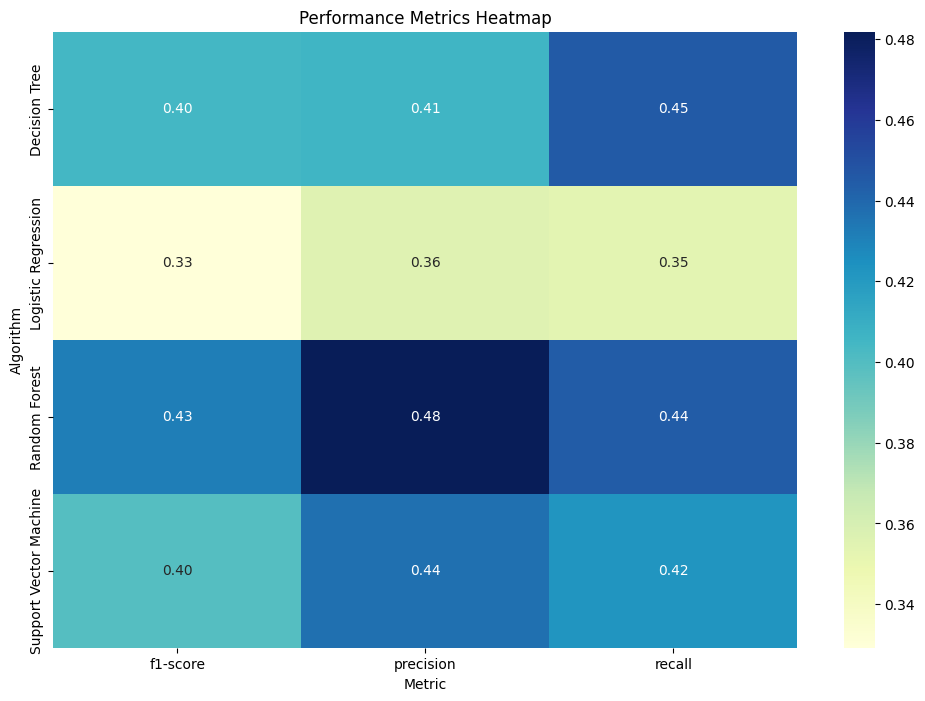

In [19]:
results = machine_learning_evaluation(features, orbits_id_classes, print_results=True)